In [1]:
from __future__ import print_function
from __future__ import division
from astropy.time import Time
import numpy as np
from barycorrpy import get_BC_vel , exposure_meter_BC_vel
from barycorrpy import utc_tdb
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=16

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
# Observation of Tau Ceti taken from CTIO on JD 2458000. Observatory location taken from Astropy list.
# Stellar positional parameters taken from Hipparcos Catalogue
JDUTC = Time(2458000, format='jd', scale='utc')
result2  = get_BC_vel(JDUTC=JDUTC, hip_id=8102, obsname='CTIO', ephemeris='de430')

In [9]:
ra=39.9
dec=60.8
obsname='GBT'
epoch = 2451545.0
rv = 0.0
zmeas=0.0
JDUTC=np.linspace(2459160,2459180,1000) # Can also enter JDUTC as float instead of Astropy Time Object
ephemeris='https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/a_old_versions/de405.bsp'

result3=get_BC_vel(JDUTC=JDUTC, ra=ra, dec=dec, obsname='GBT', rv=rv, zmeas=zmeas, epoch=epoch, ephemeris=ephemeris, leap_update=True)

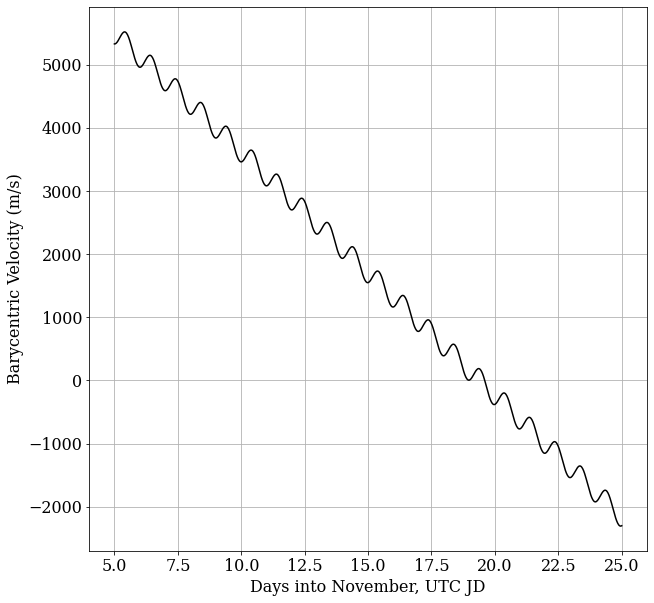

In [19]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

ax.plot(JDUTC-2459155,result3[0],'k-')
ax.set_xlabel("Days into November, UTC JD")
ax.set_ylabel("Barycentric Velocity (m/s)")
ax.grid(True)

In [16]:
centT=0.5*(JDUTC[1::]+JDUTC[:-1:])-2459155
diffT=np.diff(JDUTC)*86400
diffV=np.diff(result3[0])
driftA=diffV/diffT

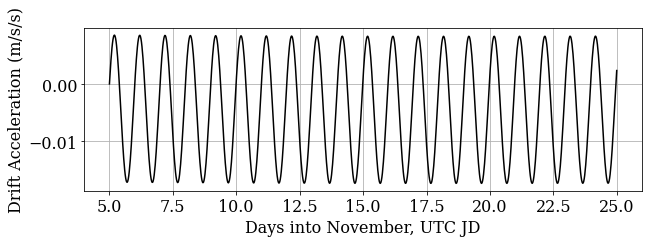

In [21]:
fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(111)

ax.plot(centT,driftA,'k-')

ax.set_xlabel("Days into November, UTC JD")
ax.set_ylabel("Drift Acceleration (m/s/s)")
ax.grid(True)

(-0.02, 0.02)

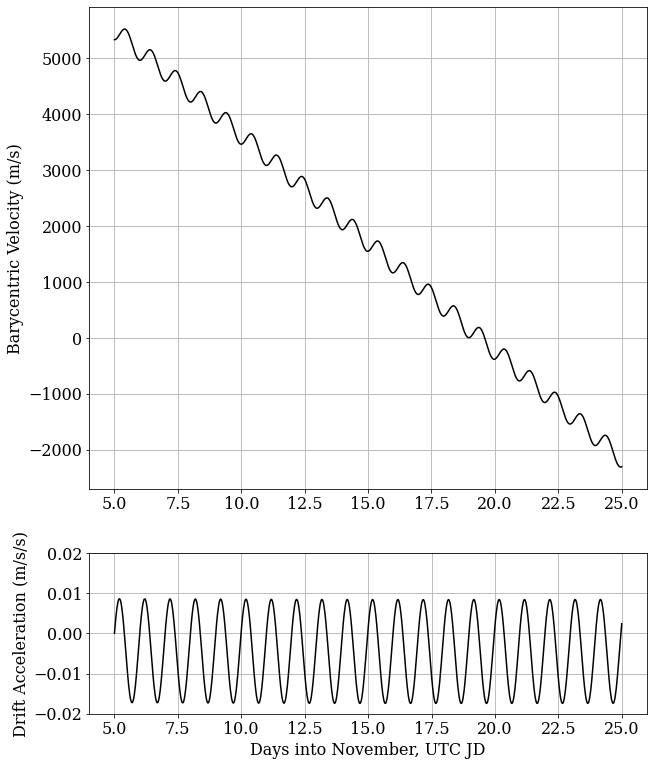

In [28]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,gridspec_kw={'height_ratios': [3, 1]},figsize=(10,13))

ax1.plot(JDUTC-2459155,result3[0],'k-')
ax1.set_ylabel("Barycentric Velocity (m/s)")
ax1.grid(True)

ax2.plot(centT,driftA,'k-')

ax2.set_xlabel("Days into November, UTC JD")
ax2.set_ylabel("Drift Acceleration (m/s/s)")
ax2.grid(True)
ax2.set_ylim(-0.02,0.02)

#plt.savefig("DriftVelAcc.png",format='png',bbox_inches='tight')